# Practica de ML de Jorge Melgosa

Es un problema de regresión: tenéis que predecir el precio del airbnb utilizando los datos disponibles. Se valorará:
- Generación de nuevas características a partir de las existentes
- Codificación de variables
- Análisis exploratorio
- Selección y evaluación del modelo
- Comparativa de distintos algoritmos

## 1. Obtendremos los datos que vamos a utilizar.


In [1]:
# Cargamos las librerias minimas
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Vamos a generar directamente los dos grupos de datos de trabajo desde el archivo original de datos..

In [2]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./data/airbnb-listings.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos por separado los datos de training y test
train.to_csv('./data/airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/airbnb_test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


## 2. Procesado de datos.

In [2]:
#cargamos el fichero con los datos
df_train = pd.read_csv('./data/airbnb_train.csv', sep=';', decimal='.')

print(f'El juego de datos de train con el que vamos a trabajar tiene:')
print(f'- {df_train.shape[0]} filas')
print(f'- {df_train.shape[1]} columnas')

El juego de datos de train con el que vamos a trabajar tiene:
- 11824 filas
- 89 columnas


### Conocimiento de los datos iniciales

In [3]:
df_train.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11977959,https://www.airbnb.com/rooms/11977959,20170407214119,2017-04-08,CH6! DUPLEXCity + Parking + FibraÓptica,- LLEGADAS DESPUÉS 20.00H SUPLEMENTO DE 10€ - ...,- LLEGADAS DESPUÉS 20.00H SUPLEMENTO DE 10€ - ...,- LLEGADAS DESPUÉS 20.00H SUPLEMENTO DE 10€ - ...,none,- LLEGADAS DESPUÉS 20.00H SUPLEMENTO DE 10€ - ...,...,9.0,8.0,10.0,NaN,NaN,moderate,8.0,3.82,"40.333894452753626,-3.703454453982968","Host Has Profile Pic,Host Identity Verified,Is..."
1,14736780,https://www.airbnb.com/rooms/14736780,20170407214119,2017-04-08,Aptos MLR-San Ginés Puerta del Sol,"Excelente apartamento amplio, cómodo y de deco...",NaN,"Excelente apartamento amplio, cómodo y de deco...",none,"El Apartamento San Ginés, se encuentra situado...",...,10.0,10.0,10.0,NaN,NaN,strict,18.0,1.14,"40.41701912700815,-3.7060643881288216","Host Has Profile Pic,Host Identity Verified,Is..."
2,16538281,https://www.airbnb.com/rooms/16538281,20170407214119,2017-04-08,Bright Cozy House very near Madrid Airport & I...,"House surrounded by small parks, within the vi...",It is unique for people who want to visit Madr...,"House surrounded by small parks, within the vi...",none,"The town, although it is already a neighborhoo...",...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.37,"40.46703472881566,-3.581097815725425","Host Has Profile Pic,Is Location Exact,Require..."
3,15560522,https://www.airbnb.com/rooms/15560522,20170407214119,2017-04-08,SPECIAL PENTHOUSE AMONG GRAN VIA & SOL (WIFI&A/C),"Awesome & perfect apartment in PRECIADOS, few ...",This property is located in the heart of Madri...,"Awesome & perfect apartment in PRECIADOS, few ...",none,The center of Madrid is the oldest part of our...,...,10.0,10.0,10.0,NaN,NaN,strict,11.0,8.43,"40.418971360833574,-3.707798478433542","Host Has Profile Pic,Host Identity Verified,Is..."
4,11768012,https://www.airbnb.com/rooms/11768012,20170407214119,2017-04-08,Habitación confortable I,"La habitación es amplia, iluminada, exterior, ...",NaN,"La habitación es amplia, iluminada, exterior, ...",none,NaN,...,10.0,9.0,9.0,NaN,NaN,moderate,3.0,4.75,"40.34941167502538,-3.6923169295394773","Host Has Profile Pic,Host Identity Verified,Is..."


In [4]:
#Comprobamos que tipo de datos tenemos en las columnas 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11824 non-null  int64  
 1   Listing Url                     11824 non-null  object 
 2   Scrape ID                       11824 non-null  int64  
 3   Last Scraped                    11824 non-null  object 
 4   Name                            11823 non-null  object 
 5   Summary                         11334 non-null  object 
 6   Space                           8753 non-null   object 
 7   Description                     11820 non-null  object 
 8   Experiences Offered             11824 non-null  object 
 9   Neighborhood Overview           7320 non-null   object 
 10  Notes                           4523 non-null   object 
 11  Transit                         7275 non-null   object 
 12  Access                          

### Funciones globales

Definición de alguna funciones que nos faciliten el trabajo.

In [6]:
def drop_colums_dataframe(df, drop_colums):
    
    df = df.drop(drop_colums, axis=1)
    
    return df

### Procesado de datos de la parte de train

In [7]:
#Vamos a eliminar todas las columnas que bajo nuestro criterio no nos aportan, como son columnas de ID, descripciones, informativas ...
drop_colum = ['ID','Listing Url','Scrape ID','Last Scraped','Name','Summary','Space','Description','Neighborhood Overview',
             'Notes','Transit','Access','Interaction','House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host ID',
             'Host URL','Host Name','Host Since','Host Location','Host About','Host Response Time','Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url',
             'Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications','Street','Neighbourhood','Neighbourhood Group Cleansed',
             'Zipcode','Smart Location','Country Code','Amenities','Weekly Price','Monthly Price','Security Deposit',
             'Calendar Updated','Has Availability','Availability 30','Availability 60','Availability 90',
             'Availability 365','Calendar last Scraped','First Review','Last Review','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication',
             'Review Scores Location','Review Scores Value','License','Jurisdiction Names','Calculated host listings count','Reviews per Month','Geolocation','Features']
df_train = drop_colums_dataframe(df_train,drop_colum)

print(f'Tras la primera limpieza de datos, la dimensión es:')
print(f'- {df_train.shape[0]} filas')
print(f'- {df_train.shape[1]} columnas')


#Codificamos las variables que no son númericas
from sklearn.preprocessing import LabelEncoder

experiences = LabelEncoder()
experiences.fit(df_train['Experiences Offered'])
df_train['Experiences Offered'] = experiences.transform(df_train['Experiences Offered'])

neighbourhood = LabelEncoder()
neighbourhood.fit(df_train['Neighbourhood Cleansed'])
df_train['Neighbourhood Cleansed'] = neighbourhood.transform(df_train['Neighbourhood Cleansed'])

city = LabelEncoder()
city.fit(df_train['City'])
df_train['City'] = city.transform(df_train['City'])

state = LabelEncoder()
state.fit(df_train['State'])
df_train['State'] = state.transform(df_train['State'])

market = LabelEncoder()
market.fit(df_train['Market'])
df_train['Market'] = market.transform(df_train['Market'])

country = LabelEncoder()
country.fit(df_train['Country'])
df_train['Country'] = country.transform(df_train['Country'])

property_type = LabelEncoder()
property_type.fit(df_train['Property Type'])
df_train['Property Type'] = property_type.transform(df_train['Property Type'])

room_type = LabelEncoder()
room_type.fit(df_train['Room Type'])
df_train['Room Type'] = room_type.transform(df_train['Room Type'])

bed_type = LabelEncoder()
bed_type.fit(df_train['Bed Type'])
df_train['Bed Type'] = bed_type.transform(df_train['Bed Type'])

cancellation_policy = LabelEncoder()
cancellation_policy.fit(df_train['Cancellation Policy'])
df_train['Cancellation Policy'] = cancellation_policy.transform(df_train['Cancellation Policy'])


#Realizamos una segunda limpieza de columnas que vemos que no influyen demasiado
drop_colum2 = ['Experiences Offered','Minimum Nights','Maximum Nights','Review Scores Rating','Bed Type',
               'Latitude','Longitude','Number of Reviews']
df_train = drop_colums_dataframe(df_train,drop_colum2)


#convertimos en metros cuadrados la columna con pies cuadrados
df_train['Square Feet'] = df_train['Square Feet'].apply(lambda x: x * 0.3048 * 0.3048) 

#Renombrar las columnas
columns_rename = ['neighbourhood', 'city', 'state', 'market', 'country',
                       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
                       'beds', 'square_meter', 'price', 'cleaning_fee', 'guests_included',
                       'extra_people', 'cancellation_policy']
df_train.columns = columns_rename


#En este punto podríamos tener un conjunto de datos valido, para comenzar el análisis exploratorio.
df_train.head().T


Tras la primera limpieza de datos, la dimensión es:
- 11824 filas
- 25 columnas


,0,1,2,3,4
neighbourhood,312.0,345.0,7.0,345.0,212.0
city,103.0,103.0,103.0,103.0,103.0
state,25.0,25.0,25.0,25.0,56.0
market,20.0,20.0,20.0,20.0,20.0
country,13.0,13.0,13.0,13.0,13.0
property_type,0.0,0.0,14.0,0.0,0.0
room_type,0.0,0.0,1.0,0.0,1.0
accommodates,4.0,6.0,5.0,4.0,2.0
bathrooms,2.0,2.0,3.0,1.0,1.0
bedrooms,1.0,2.0,3.0,1.0,1.0


Vemos que tenemos valores NaN que afectarán a nuestro analisis y despues modelado, por lo que vamos a tratar estos valores.

In [8]:
df_train.isnull().sum(axis=0)

neighbourhood              0
city                       0
state                      0
market                     0
country                    0
property_type              0
room_type                  0
accommodates               0
bathrooms                 47
bedrooms                  24
beds                      41
square_meter           11334
price                     14
cleaning_fee            4910
guests_included            0
extra_people               0
cancellation_policy        0
dtype: int64

Vemos que han 8 columnas que disponen de valores NaN debemos de tratar de manera individualizada cada uno de ellos. Pero con una mirada rapida podemos distinguir dos grupos. Uno donde el peso es muy alto y el otro donde los valores con NaN son residuales.

In [9]:
print(f"El porcentaje de valores sin inicializar de la columna m2 es {round(df_train['square_meter'].isnull().sum()/df_train.shape[0]*100)}%")
print(f"El porcentaje de valores sin inicializar de la columna cleaning_fee es {round(df_train['cleaning_fee'].isnull().sum()/df_train.shape[0]*100)}%")


El porcentaje de valores sin inicializar de la columna m2 es 96%
El porcentaje de valores sin inicializar de la columna cleaning_fee es 42%


In [10]:
# eliminaremos la columna m2 puesto que tiene un porcentaje muy elevado
df_train = df_train.drop(['square_meter'], axis=1)
#para cleaning_fee imputaremos valor
df_train = df_train.fillna(value={"cleaning_fee":0})
#para las variables que tienen pocos NaN usaremos la moda 
df_train = df_train.fillna(value={"bathrooms":df_train["bathrooms"].mode()[0]})
df_train = df_train.fillna(value={"bedrooms":df_train["bedrooms"].mode()[0]})
df_train = df_train.fillna(value={"beds":df_train["beds"].mode()[0]})
df_train = df_train.fillna(value={"price":df_train["price"].mode()[0]})

In [11]:
df_train.isnull().sum(axis=0)

neighbourhood          0
city                   0
state                  0
market                 0
country                0
property_type          0
room_type              0
accommodates           0
bathrooms              0
bedrooms               0
beds                   0
price                  0
cleaning_fee           0
guests_included        0
extra_people           0
cancellation_policy    0
dtype: int64

Ahora si que disponemos de un juego de datos candidato a comenzar con el análisis exploratorio, tras haberle procesado.

In [12]:
df_train.head().T

,0,1,2,3,4
neighbourhood,312.0,345.0,7.0,345.0,212.0
city,103.0,103.0,103.0,103.0,103.0
state,25.0,25.0,25.0,25.0,56.0
market,20.0,20.0,20.0,20.0,20.0
country,13.0,13.0,13.0,13.0,13.0
property_type,0.0,0.0,14.0,0.0,0.0
room_type,0.0,0.0,1.0,0.0,1.0
accommodates,4.0,6.0,5.0,4.0,2.0
bathrooms,2.0,2.0,3.0,1.0,1.0
bedrooms,1.0,2.0,3.0,1.0,1.0


### Procesado de datos de la parte de test

Una vez realizado el trabajo sobre la parte de trein debemos de realizar el mismo trabajo sobre la parte de test, para que los datos sean coerentes.

In [13]:
#cargamos el fichero con los datos
df_test = pd.read_csv('./data/airbnb_test.csv', sep=';', decimal='.')

print(f'El juego de datos de train con el que vamos a trabajar tiene:')
print(f'- {df_test.shape[0]} filas')
print(f'- {df_test.shape[1]} columnas')

df_test = drop_colums_dataframe(df_test, drop_colum)

print(f'Tras la primera limpieza de datos, la dimensión es:')
print(f'- {df_test.shape[0]} filas')
print(f'- {df_test.shape[1]} columnas')

#Codificamos las variables no numéricas
experiences.fit(df_test['Experiences Offered'])
df_test['Experiences Offered'] = experiences.transform(df_test['Experiences Offered'])

neighbourhood.fit(df_test['Neighbourhood Cleansed'])
df_test['Neighbourhood Cleansed'] = neighbourhood.transform(df_test['Neighbourhood Cleansed'])

city.fit(df_test['City'])
df_test['City'] = city.transform(df_test['City'])

state.fit(df_test['State'])
df_test['State'] = state.transform(df_test['State'])

market.fit(df_test['Market'])
df_test['Market'] = market.transform(df_test['Market'])

country.fit(df_test['Country'])
df_test['Country'] = country.transform(df_test['Country'])

property_type.fit(df_test['Property Type'])
df_test['Property Type'] = property_type.transform(df_test['Property Type'])

room_type.fit(df_test['Room Type'])
df_test['Room Type'] = room_type.transform(df_test['Room Type'])

bed_type.fit(df_test['Bed Type'])
df_test['Bed Type'] = bed_type.transform(df_test['Bed Type'])

cancellation_policy.fit(df_test['Cancellation Policy'])
df_test['Cancellation Policy'] = cancellation_policy.transform(df_test['Cancellation Policy'])

#Realizamos una segunda limpieza de columnas que vemos que no influyen demasiado
df_test = drop_colums_dataframe(df_test, drop_colum2)

#convertimos en metros cuadrados la columna con pies cuadrados
df_test['Square Feet'] = df_test['Square Feet'].apply(lambda x: x * 0.3048 * 0.3048) 

#renombramos las columnas
df_test.columns = columns_rename

# eliminaremos la columna m2 puesto que tiene un porcentaje muy elevado
df_test = df_test.drop(['square_meter'], axis=1)
#para cleaning_fee imputaremos valor
df_test = df_test.fillna(value={"cleaning_fee":0})
#para las variables que tienen pocos NaN usaremos la moda 
df_test = df_test.fillna(value={"bathrooms":df_test["bathrooms"].mode()[0]})
df_test = df_test.fillna(value={"bedrooms":df_test["bedrooms"].mode()[0]})
df_test = df_test.fillna(value={"beds":df_test["beds"].mode()[0]})
df_test = df_test.fillna(value={"price":df_test["price"].mode()[0]})

El juego de datos de train con el que vamos a trabajar tiene:
- 2956 filas
- 89 columnas
Tras la primera limpieza de datos, la dimensión es:
- 2956 filas
- 25 columnas


In [95]:
"""
ESTA NO LA EJECUTAMOS.
una vez ejecutado el ejercicio he visto que había mucho overfitting y podriamos 
simplificar un poco el modelo visto que hay varibles que tienen muy poco peso como son las relacionadas con la hubicación y el tipo

drop_colum3 = ['neighbourhood','city','state','market','country','property_type']
drop_colum3 = ['neighbourhood','city','market','country','property_type']
df_train = drop_colums_dataframe(df_train, drop_colum3)
df_test = drop_colums_dataframe(df_test, drop_colum3)
"""

"\nESTA NO LA EJECUTAMOS.\nuna vez ejecutado el ejercicio he visto que había mucho overfitting y podriamos \nsimplificar un poco el modelo visto que hay varibles que tienen muy poco peso como son las relacionadas con la hubicación y el tipo\n\ndrop_colum3 = ['neighbourhood','city','state','market','country','property_type']\ndrop_colum3 = ['neighbourhood','city','market','country','property_type']\ndf_train = drop_colums_dataframe(df_train, drop_colum3)\ndf_test = drop_colums_dataframe(df_test, drop_colum3)\n"

## 3. Análisis exploratorio.

Mostraremos un resumen rápido de los datos que tenemos, donde veremos cierta información de interes como la media, desviación estándar, los quartiles de cada una de las variables... 

In [14]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
neighbourhood,11824.0,210.557087,117.153910,0.0,127.0,185.0,317.0,443.0
city,11824.0,102.255413,22.579574,0.0,103.0,103.0,103.0,220.0
state,11824.0,28.505244,13.620736,0.0,25.0,25.0,25.0,96.0
market,11824.0,19.949340,3.578705,0.0,20.0,20.0,20.0,41.0
country,11824.0,12.871532,1.341718,0.0,13.0,13.0,13.0,17.0
property_type,11824.0,2.257865,5.091589,0.0,0.0,0.0,0.0,21.0
room_type,11824.0,0.408153,0.519130,0.0,0.0,0.0,1.0,2.0
accommodates,11824.0,3.277233,2.093138,1.0,2.0,3.0,4.0,16.0
bathrooms,11824.0,1.285606,0.666086,0.0,1.0,1.0,1.0,8.0
bedrooms,11824.0,1.344215,0.904519,0.0,1.0,1.0,2.0,10.0


Nos apoyaremos en la representación del histograma de alguna de las variables, para una mejor interpretación.

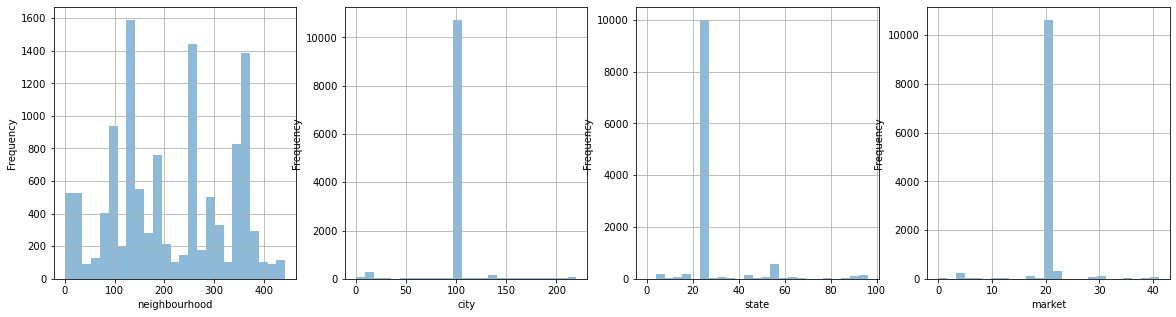

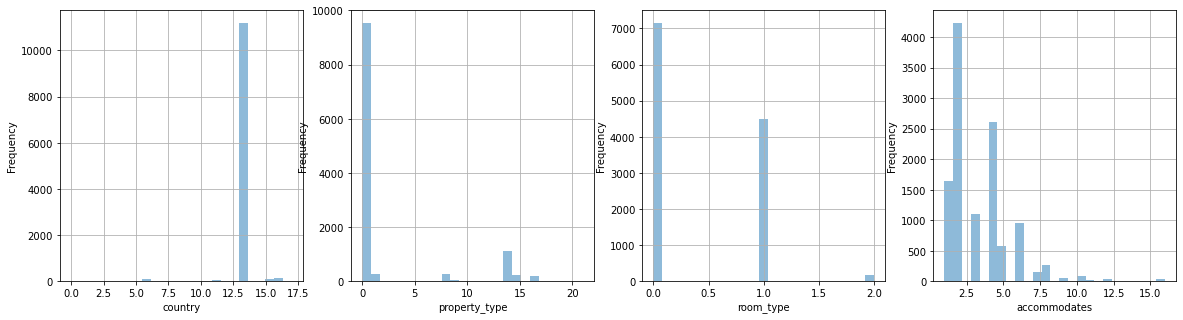

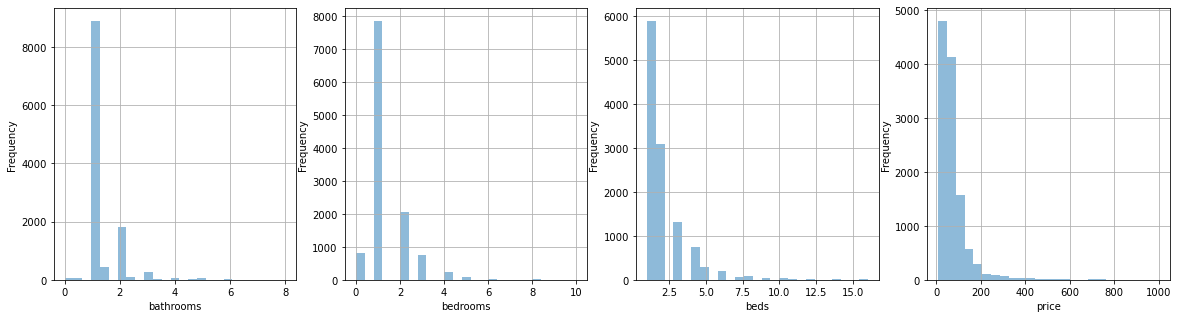

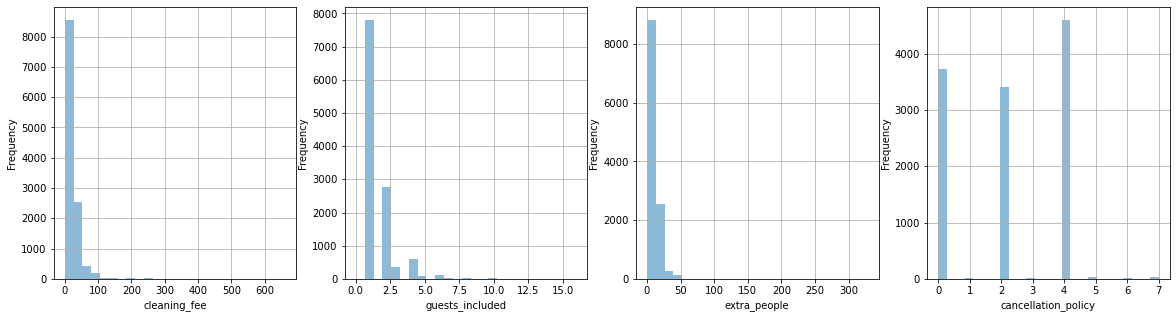

In [22]:
plt.figure(figsize=(20, 5))

plt.subplot(1,4,1)
df_train['neighbourhood'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('neighbourhood')

plt.subplot(1,4,2)
df_train['city'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('city')

plt.subplot(1,4,3)
df_train['state'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('state')

plt.subplot(1,4,4)
df_train['market'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('market')

plt.show()


plt.figure(figsize=(20, 5))

plt.subplot(1,4,1)
df_train['country'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('country')

plt.subplot(1,4,2)
df_train['property_type'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('property_type')

plt.subplot(1,4,3)
df_train['room_type'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('room_type')

plt.subplot(1,4,4)
df_train['accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('accommodates')

plt.show()


plt.figure(figsize=(20, 5))

plt.subplot(1,4,1)
df_train['bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('bathrooms')

plt.subplot(1,4,2)
df_train['bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('bedrooms')

plt.subplot(1,4,3)
df_train['beds'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('beds')

plt.subplot(1,4,4)
df_train['price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('price')

plt.show()


plt.figure(figsize=(20, 5))

plt.subplot(1,4,1)
df_train['cleaning_fee'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('cleaning_fee')

plt.subplot(1,4,2)
df_train['guests_included'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('guests_included')

plt.subplot(1,4,3)
df_train['extra_people'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('extra_people')

plt.subplot(1,4,4)
df_train['cancellation_policy'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('cancellation_policy')

plt.show()

Vamos a ver como se relacionan estas variables con la variable de respuesta precio.

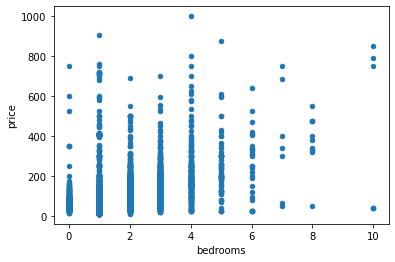

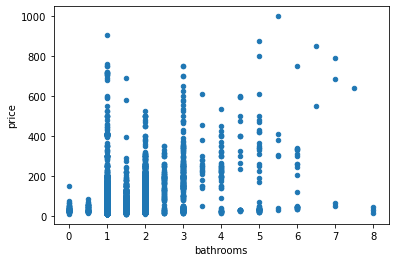

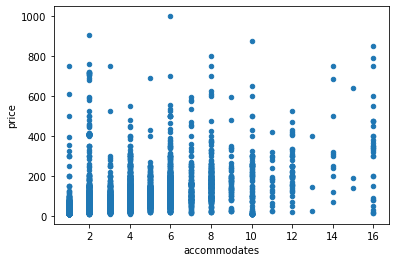

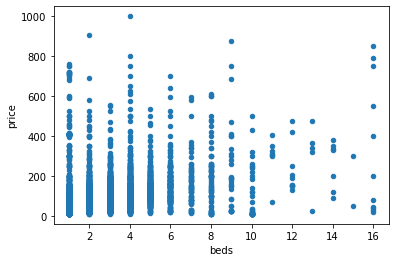

In [24]:
df_train.plot(kind = 'scatter',x='bedrooms',y = 'price')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

df_train.plot(kind = 'scatter',x='bathrooms',y = 'price')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()

df_train.plot(kind = 'scatter',x='accommodates',y = 'price')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.show()

df_train.plot(kind = 'scatter',x='beds',y = 'price')
plt.xlabel('beds')
plt.ylabel('price')
plt.show()

No tenemos grandes outliers en nuestro conjunto de datos pero podemos ajustar alguna cosilla para tener mas fina la bateria de entrenamiento.

In [42]:
# En el gráfico donde pintamos los valores de la ciudad vemos que casi todos los datos estan en una ciudad, por lo que vamos ajustar.
df_train['city'].value_counts()

103    10567
15       228
98       105
135       86
219       47
       ...  
17         1
76         1
109        1
166        1
67         1
Name: city, Length: 221, dtype: int64

In [44]:
df_train_filtered = df_train[df_train['city'] == 103]

print(f'Original: {df_train.shape[0]}\nFiltered: {df_train_filtered.shape[0]}')
print(f'Diferencia: {(df_train.shape[0] - df_train_filtered.shape[0])/df_train.shape[0]*100}%')

# No voy a quedarme solo con esa ciudad porque eliminaria un 10% de los datos.

Original: 11824
Filtered: 10567
Diferencia: 10.630920162381596%


In [47]:
#trabajamos sobre las habitaciones
df_train['bedrooms'].value_counts()

1.0    7846
2.0    2068
0.0     801
3.0     747
4.0     241
5.0      70
6.0      28
Name: bedrooms, dtype: int64

In [48]:
df_train_filtered2 = df_train[df_train['bedrooms']<=6]

print(f'Original: {df_train.shape[0]}\nFiltered: {df_train_filtered2.shape[0]}')
print(f'Diferencia: {(df_train.shape[0] - df_train_filtered2.shape[0])/df_train.shape[0]*100}%')
df_train = df_train_filtered2

# eliminamos todos los registros que tienen mas de 7 habitaciones.

Original: 11801
Filtered: 11801
Diferencia: 0.0%


In [123]:
#trabajamos sobre los baños
df_train['bathrooms'].value_counts()

1.0    8895
2.0    1811
1.5     453
3.0     266
2.5      97
4.0      57
0.0      52
5.0      51
0.5      50
6.0      21
4.5      20
3.5      19
5.5       5
8.0       3
7.5       1
Name: bathrooms, dtype: int64

In [54]:
df_train_filtered3 = df_train[~df_train['bathrooms'].isin([7.5,5.5,3.5,4.5,0.5,2.5,1.5])]

print(f'Original: {df_train.shape[0]}\nFiltered: {df_train_filtered3.shape[0]}')
print(f'Diferencia: {(df_train.shape[0] - df_train_filtered3.shape[0])/df_train.shape[0]*100}%')

df_train_filtered3['bathrooms'].value_counts()

# vamos a eliminar todos los registros con 1/2 baño, porque no tiene mucho sentido. Es cierto que perdemos un 5.4% de datos
# pero ganamos en claridad, puesto que no entiendo que es un baño y medio
df_train = df_train_filtered3

Original: 11801
Filtered: 11156
Diferencia: 5.465638505211422%


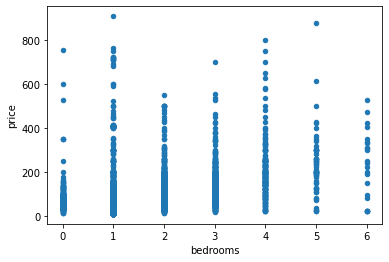

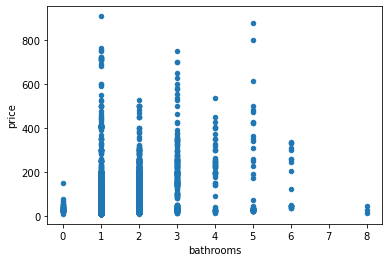

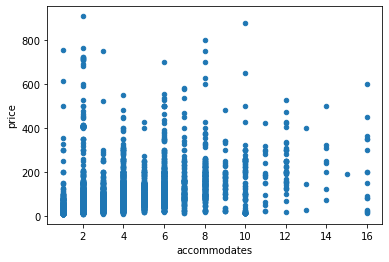

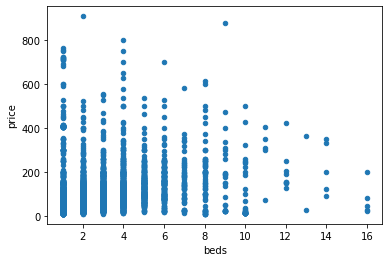

In [55]:
df_train.plot(kind = 'scatter',x='bedrooms',y = 'price')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

df_train.plot(kind = 'scatter',x='bathrooms',y = 'price')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()

df_train.plot(kind = 'scatter',x='accommodates',y = 'price')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.show()

df_train.plot(kind = 'scatter',x='beds',y = 'price')
plt.xlabel('beds')
plt.ylabel('price')
plt.show()

Veremos la correlación que hay entre las variables en este punto.

In [56]:
df_train.corr()

,neighbourhood,city,state,market,country,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,cancellation_policy
neighbourhood,1.000000,-0.073195,-0.003286,-0.150515,-0.029039,-0.033730,-0.057825,0.047496,0.015749,0.015929,0.013772,0.053536,0.049218,0.041921,0.033831,0.057179
city,-0.073195,1.000000,0.272383,0.600657,-0.082407,0.054665,0.047103,-0.041470,0.005183,-0.038626,-0.019185,0.076124,-0.016700,0.008065,-0.044145,-0.055168
state,-0.003286,0.272383,1.000000,0.271931,-0.297398,-0.005278,0.025505,-0.041464,-0.025926,-0.034896,-0.054214,0.161785,0.058194,-0.014919,0.015751,-0.011416
market,-0.150515,0.600657,0.271931,1.000000,-0.195647,0.039307,0.006338,-0.007389,0.018637,-0.014797,0.021062,-0.031483,-0.020180,0.003760,-0.035228,-0.044203
country,-0.029039,-0.082407,-0.297398,-0.195647,1.000000,0.003994,0.004419,0.014183,0.018688,0.001989,0.011881,-0.049586,-0.049300,0.015151,-0.029457,0.040749
property_type,-0.033730,0.054665,-0.005278,0.039307,0.003994,1.000000,0.088368,0.034027,0.111248,0.102983,0.080747,0.071768,-0.051470,0.011648,0.012831,-0.036201
room_type,-0.057825,0.047103,0.025505,0.006338,0.004419,0.088368,1.000000,-0.490715,-0.007785,-0.256748,-0.279426,-0.364387,-0.360346,-0.345883,-0.092599,-0.222282
accommodates,0.047496,-0.041470,-0.041464,-0.007389,0.014183,0.034027,-0.490715,1.000000,0.383779,0.702703,0.828629,0.481139,0.319519,0.560589,0.235144,0.243183
bathrooms,0.015749,0.005183,-0.025926,0.018637,0.018688,0.111248,-0.007785,0.383779,1.000000,0.467903,0.433816,0.319484,0.145865,0.195971,0.078840,0.156096
bedrooms,0.015929,-0.038626,-0.034896,-0.014797,0.001989,0.102983,-0.256748,0.702703,0.467903,1.000000,0.705204,0.444645,0.265366,0.422420,0.131812,0.125262


/var/folders/w8/dsfn036n1j3b2qrgkhpt2myc0000gn/T/ipykernel_15654/411609900.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


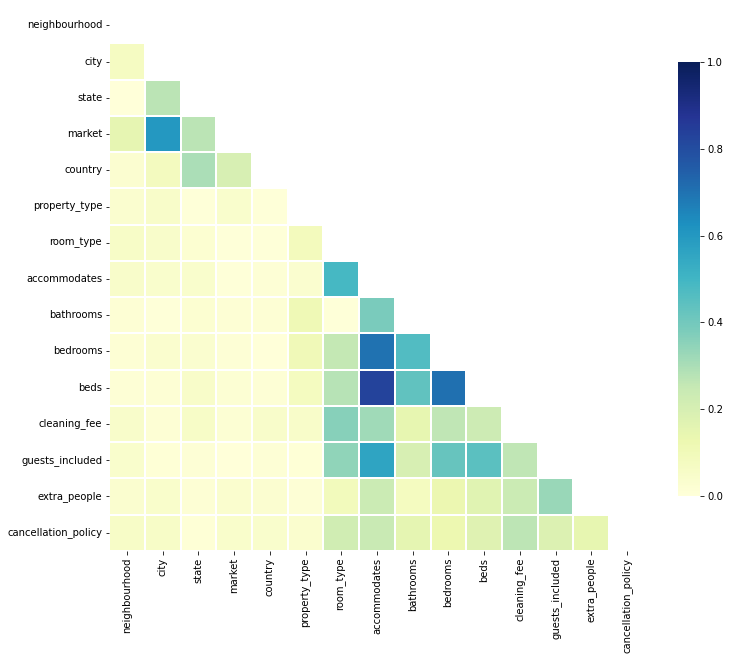

In [58]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_train.drop(['price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Representaremos todas las variables frente al resto.

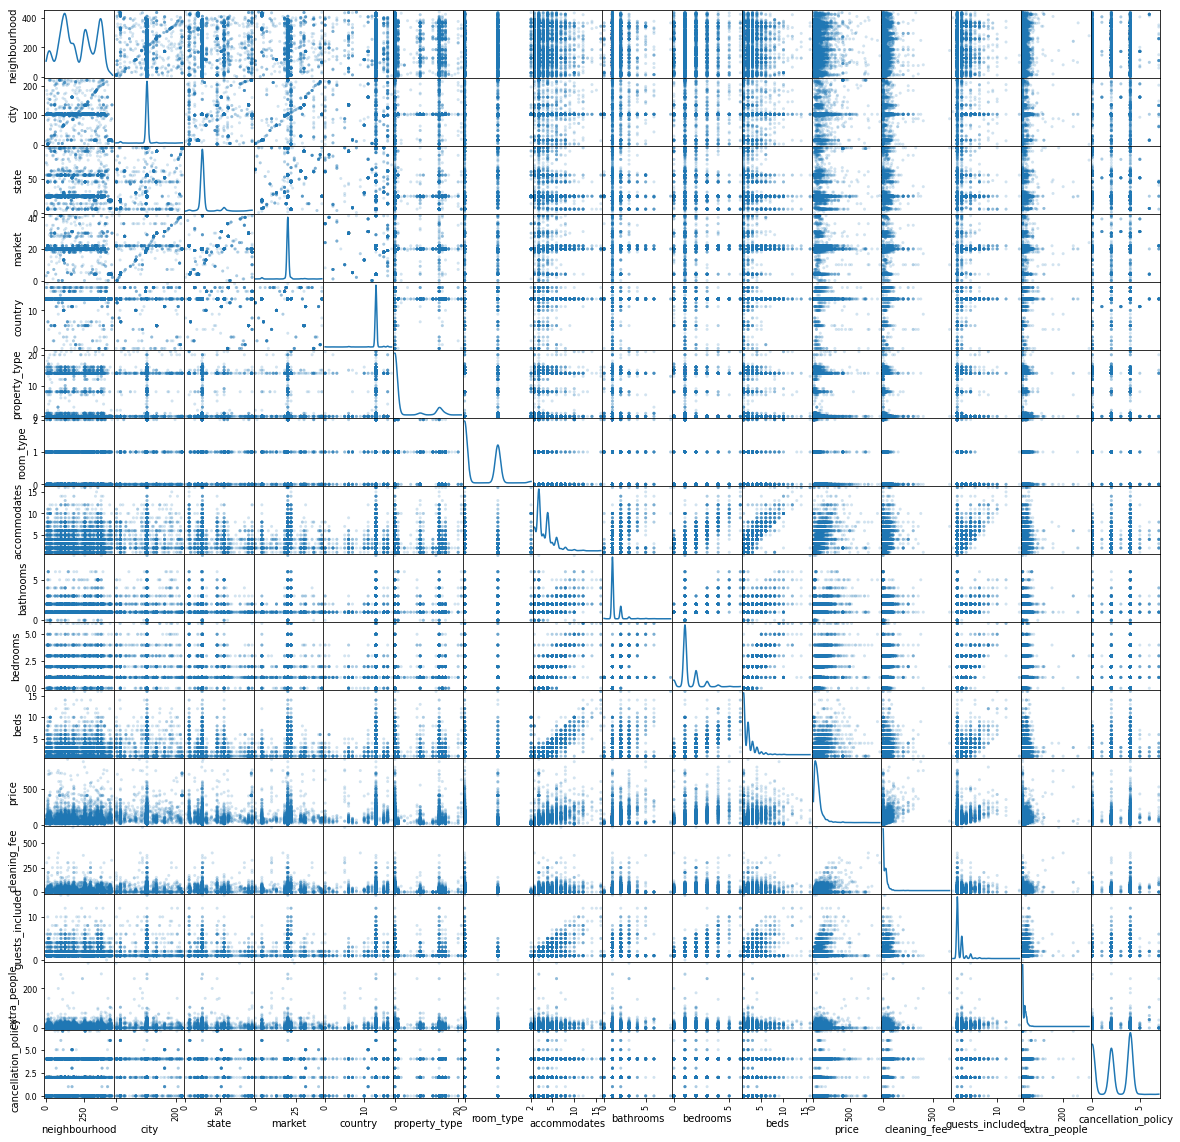

In [59]:
pd.plotting.scatter_matrix(df_train, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

## 4. Selección de características.

In [60]:
df_train.insert(0, 'price', df_train.pop('price'))
df_test.insert(0, 'price', df_test.pop('price'))

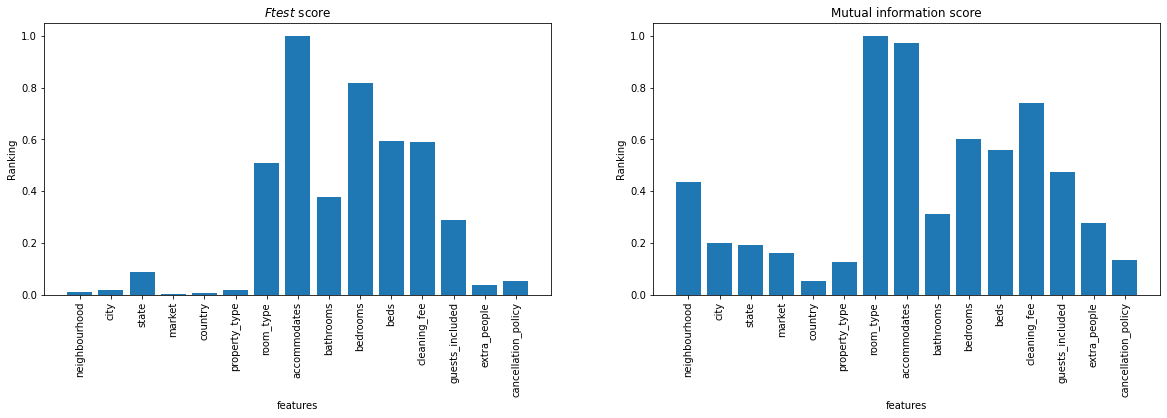

In [61]:
from sklearn.feature_selection import f_regression, mutual_info_regression

#convertimos el DataFrame al formato necesario para scikit-learn
data = df_train.values
data_test = df_test.values

#en y metemos la variable respuesta
y_train = data[:,0]
y_test = data_test[:,0] 
#el resto en X
X_train = data[:,1:]
X_test = data_test[:,1:]

feature_names = df_train.columns[1:]

f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X_train.shape[1]),f_test,  align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F test$ score')

plt.subplot(1,2,2)
plt.bar(range(X_train.shape[1]),mi, align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Con estos dos metodos podemos ver que variables van a tener mas peso dentro del algoritmo, para el calculo de la variable respuesta.


Vamos a utilizar tambien Lasso para tener otro punto de vista en la selección de variables.

best mean cross-validation score: -2726.329
best parameters: {'alpha': 0.002811768697974231}


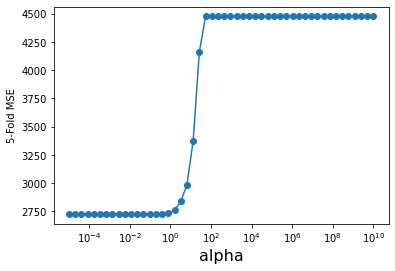

In [62]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

alpha_vector = np.logspace(-5,10,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 2.7e+03
MSE Modelo Lasso (test) : 3.54e+03
RMSE Modelo Lasso (train): 51.9
RMSE Modelo Lasso (test) : 59.5
neighbourhood 0.674088486550934
city 9.870038658917165
state 11.497439752673115
market -11.059781297023523
country -0.7848631375100443
property_type 3.9493195446547418
room_type -12.143339176097202
accommodates 15.84433289665279
bathrooms 10.631768663105865
bedrooms 10.92645767844525
beds -3.6425052322171667
cleaning_fee 14.156283429512609
guests_included -1.67792002584813
extra_people -1.966645987491835
cancellation_policy -3.4215512300328563


Lasso no nos ha desactivado ninguna variable, por lo que las que tenemos tienen impacto directo en el calculo de la respuesta, podemos ver las diferentes importancias según su valor, tanto para aumentar el precio como para reducir el mismo.

Coincide, por lo generar, con los otros dos metos utilizados con anterioridad.

## 5. Comparativa de distintos algoritmos.

### Arbol de decision

best mean cross-validation score: 0.578
best parameters: {'max_depth': 7}


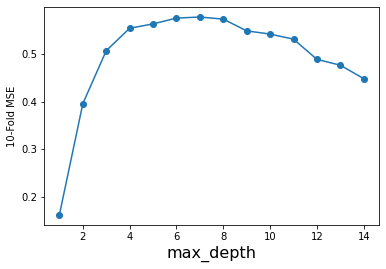

In [65]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV
from sklearn import tree


maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [70]:
maxDepthOptimo = 7 #grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.6797650801556188
Test:  0.3745862124654281


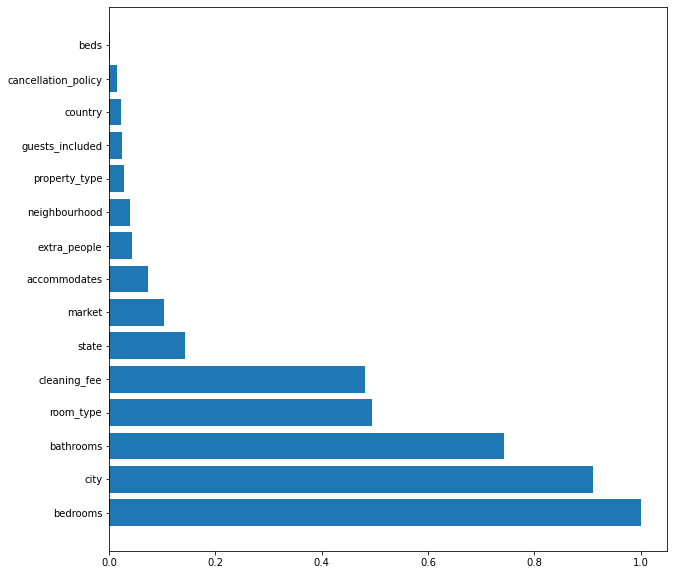

In [71]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

### Random Forest

Fitting 5 folds for each of 14 candidates, totalling 70 fits
best mean cross-validation score: 0.653
best parameters: {'max_depth': 14}


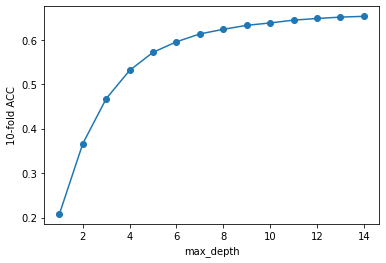

In [83]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth} #  {'max_depth': maxDepth, 'n_estimators': [100, 200, 500, 1000]}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), 
                    param_grid=tuned_parameters,cv=5, verbose=1) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [91]:
maxDepthOptimo = 11
randomforestModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomforestModel.score(X_train,y_train))
print("Test: ",randomforestModel.score(X_test,y_test))

Train:  0.720867754692888
Test:  0.4262775597084594


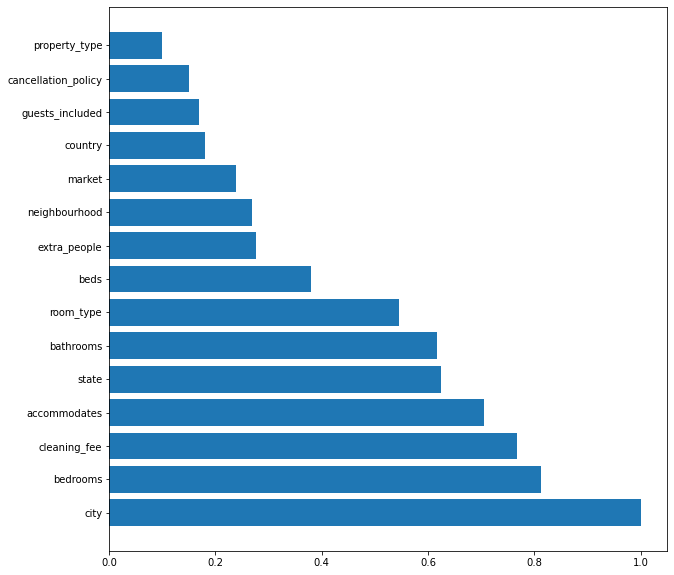

In [92]:
importances = randomforestModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

#### Bagging

Fitting 5 folds for each of 14 candidates, totalling 70 fits
best mean cross-validation score: 0.642
best parameters: {'base_estimator__max_depth': 13}


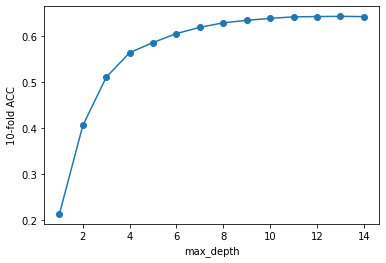

In [88]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'base_estimator__max_depth': maxDepth} #  {'max_depth': maxDepth, 'n_estimators': [100, 200, 500, 1000]}

grid = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), 
                    param_grid=tuned_parameters,cv=5, verbose=1) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [93]:
maxDepthOptimo = 10
bagModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),n_estimators=200).fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.7880977474520681
Test:  0.46024158213916666


### Conclusiones.

De los tres algoritmos que hemos utilizado, una vez que hemos tenido los datos listos, según los datos el algoritmo que mejor funcionaría para nuestro modelo sería Random Forest. Podríamos eliminar alguna de las variables para ganar en claridad, pero el resultado tampoco cambia tanto (Esta creada la celda pero no ejecutada).